In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/alanl/Downloads/Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Preprocessing

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
cat_col = []

for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [16]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [21]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [22]:
df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())

In [23]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [31]:
df.Outlet_Size  = df.Outlet_Size.fillna(df.Outlet_Size.mode()[0])

In [32]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
sum(df.Item_Visibility==0)            

526

In [38]:
df.Item_Visibility = df.Item_Visibility.replace([0],df.Item_Visibility.mean())

In [39]:
sum(df.Item_Visibility==0) 

0

In [41]:
df.Item_Fat_Content = df.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [42]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## New attributes

In [45]:
df['New_item_type'] = df.Item_Identifier.apply(lambda x: x[:2])
df['New_item_type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_item_type, Length: 8523, dtype: object

In [46]:
df['New_item_type'] = df['New_item_type'].replace({'FD':'Food','NC':'Non-Consumables','DR':'Drinks'})
df['New_item_type'].value_counts()

Food               6125
Non-Consumables    1599
Drinks              799
Name: New_item_type, dtype: int64

In [50]:
df.loc[df['New_item_type']=='Non-Consumables','Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [51]:
df["Outlet_years"] = 2013 - df.Outlet_Establishment_Year
df["Outlet_years"]

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_years, Length: 8523, dtype: int64

In [52]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item_type,Outlet_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumables,26


## EDA

<Axes: xlabel='Item_Weight', ylabel='Density'>

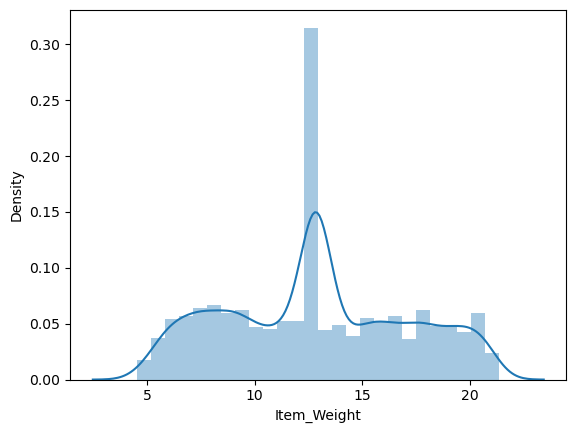

In [53]:
sns.distplot(df.Item_Weight)

<Axes: xlabel='Item_Visibility', ylabel='Density'>

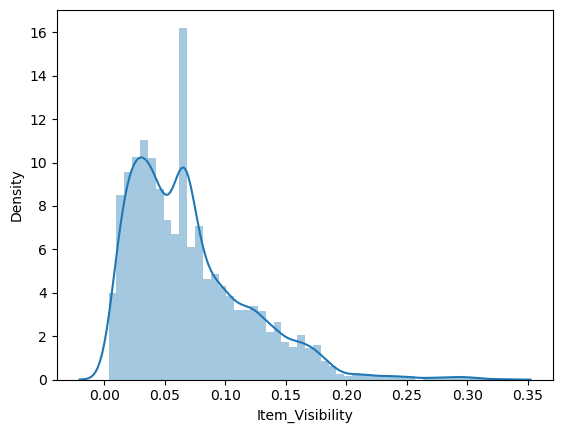

In [54]:
sns.distplot(df.Item_Visibility)

<Axes: xlabel='Item_MRP', ylabel='Density'>

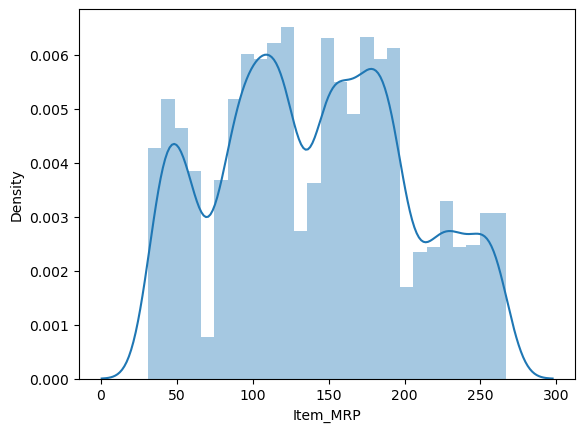

In [55]:
sns.distplot(df.Item_MRP)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

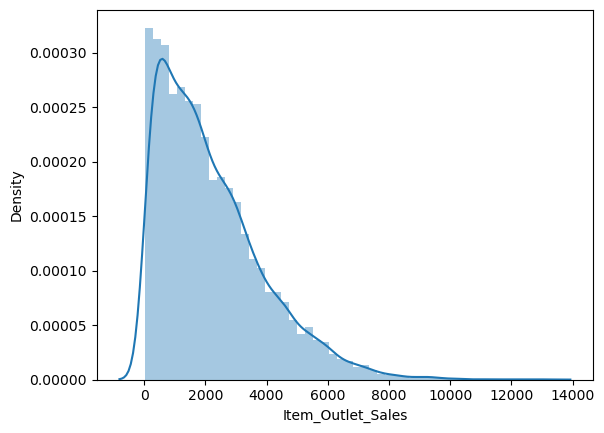

In [56]:
sns.distplot(df.Item_Outlet_Sales)

In [57]:
df.Item_Outlet_Sales = np.log(1+df.Item_Outlet_Sales)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

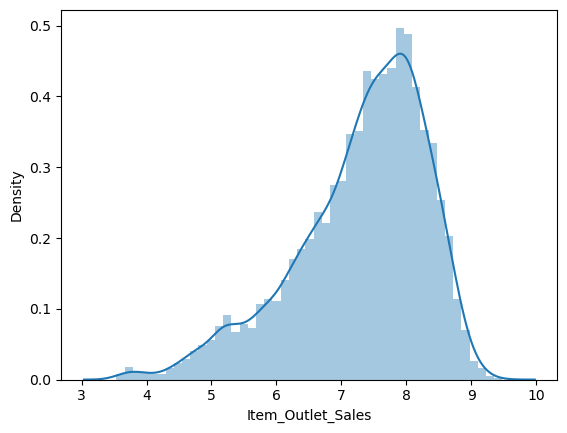

In [58]:
sns.distplot(df.Item_Outlet_Sales)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

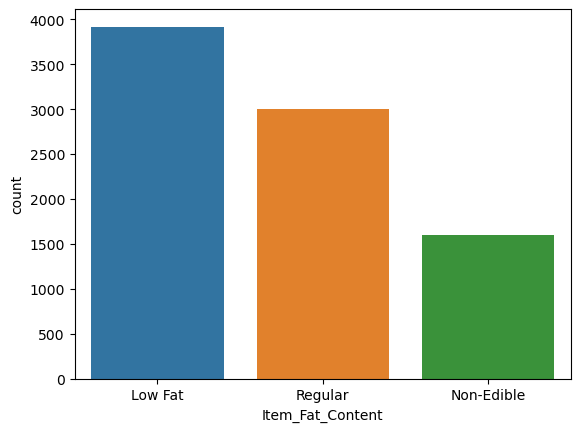

In [62]:
sns.countplot(x='Item_Fat_Content', data=df)

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

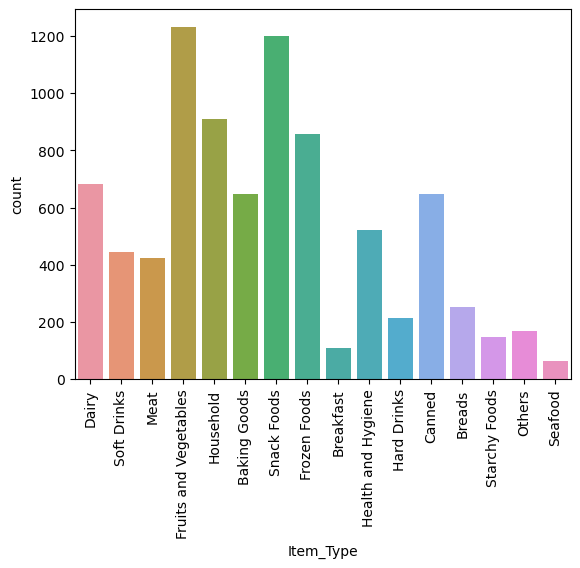

In [74]:
chart = sns.countplot(x = 'Item_Type', data=df)
chart.set_xticklabels(df.Item_Type.unique(),rotation=90)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

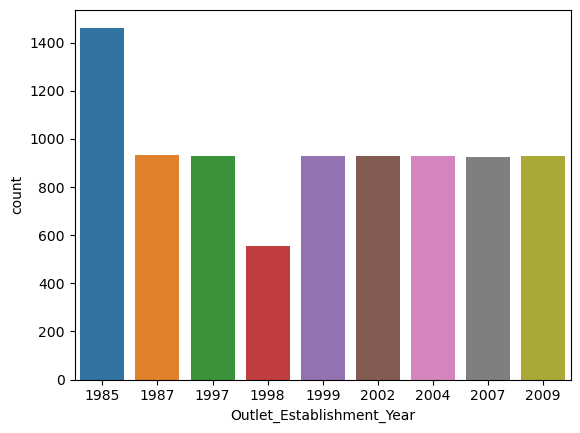

In [76]:
sns.countplot(x = 'Outlet_Establishment_Year', data=df)

<Axes: xlabel='Outlet_Size', ylabel='count'>

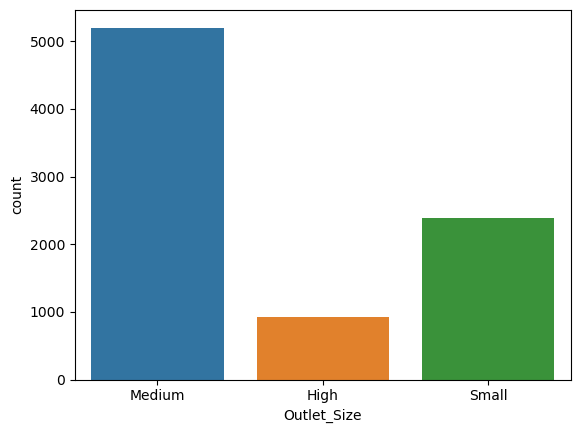

In [80]:
sns.countplot(x='Outlet_Size', data = df)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

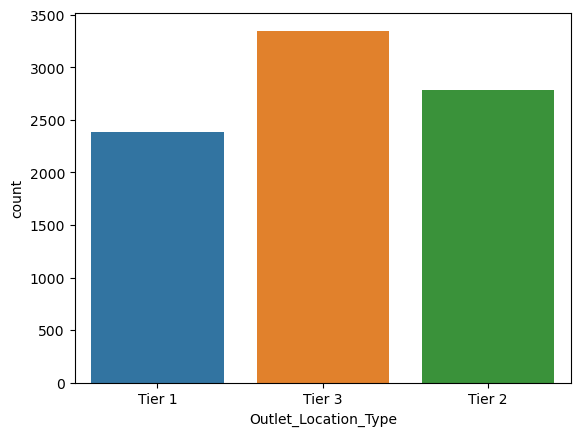

In [82]:
sns.countplot(x = 'Outlet_Location_Type', data= df)

[Text(0, 0, 'Supermarket Type1'),
 Text(1, 0, 'Supermarket Type2'),
 Text(2, 0, 'Grocery Store'),
 Text(3, 0, 'Supermarket Type3')]

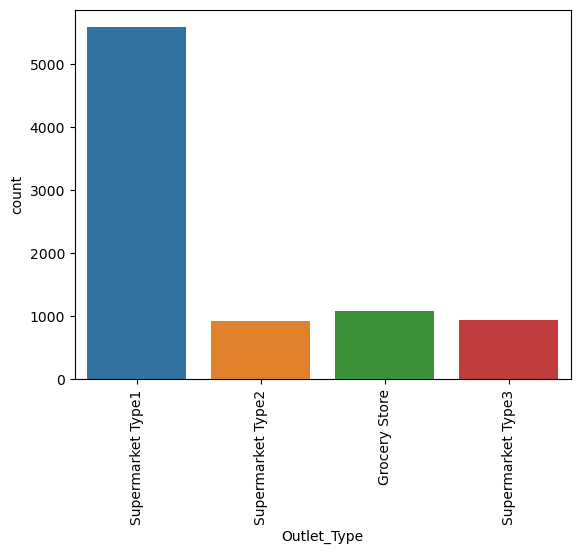

In [88]:
charts = sns.countplot(x = 'Outlet_Type', data = df)
charts.set_xticklabels(df.Outlet_Type.unique(),rotation=90)

## Correlation matrix

<Axes: >

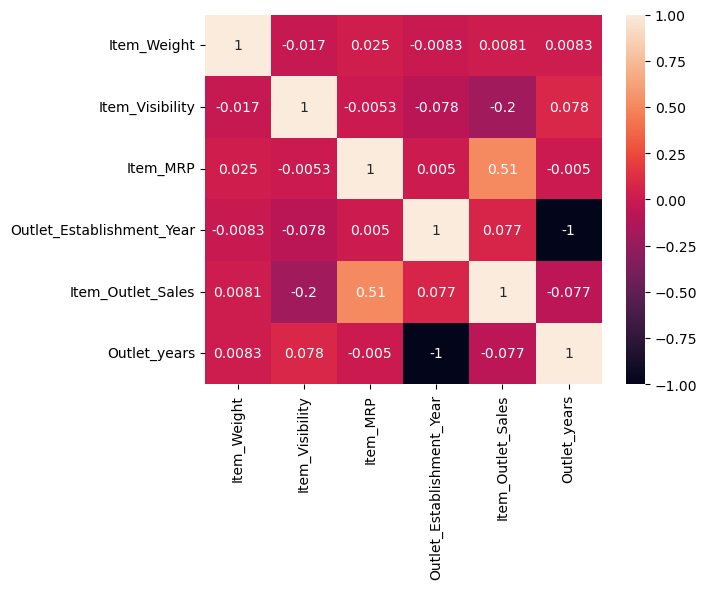

In [89]:
sns.heatmap(df.corr(),annot=True)

In [92]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item_type,Outlet_years,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,8.225808,Food,14,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,6.096776,Drinks,4,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,7.648868,Food,14,9
3,FDX07,19.20,2,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,6.597664,Food,15,0
4,NCD19,8.93,1,0.066132,Household,53.8614,OUT013,1987,0,2,1,6.903451,Non-Consumables,26,1


In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Outlet"] = le.fit_transform(df.Outlet_Identifier)
cat_col = ['Item_Fat_Content', 'Item_Type','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_item_type']

for col in cat_col:
    df[col] = le.fit_transform(df[col]) 

In [95]:
df = pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_item_type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_item_type_0,New_item_type_1,New_item_type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


In [97]:
x = df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y = df.Item_Outlet_Sales

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def train(model,x,y):
    model.fit(x,y)
    
    pred = model.predict(x)
    
    cv_score = cross_val_score(model,x,y,scoring="neg_mean_squared_error", cv=7)
    cv_score = np.abs(np.mean(cv_score))
    
    print("MSE : ",mean_squared_error(y,pred))
    print("Model Report")
    print("CV Score : ", cv_score)

MSE :  0.2880065032501795
Model Report
CV Score :  0.2891016815051501


<Axes: title={'center': 'model coef'}>

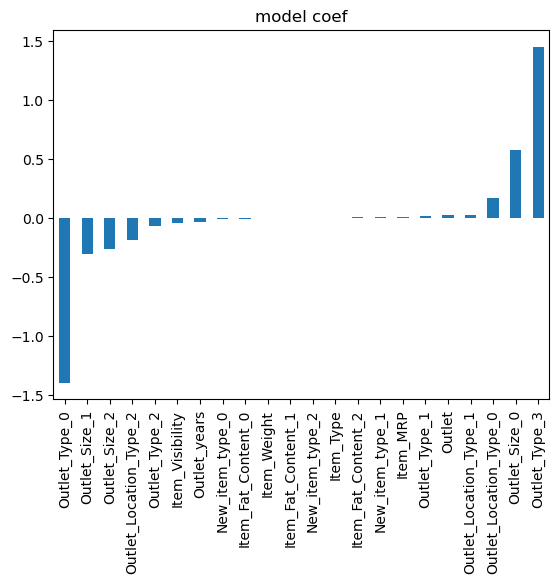

In [111]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar', title="model coef")

MSE :  5.5534030638578795e-34
Model Report
CV Score :  0.5548363627674021


<Axes: title={'center': 'Feature importance'}>

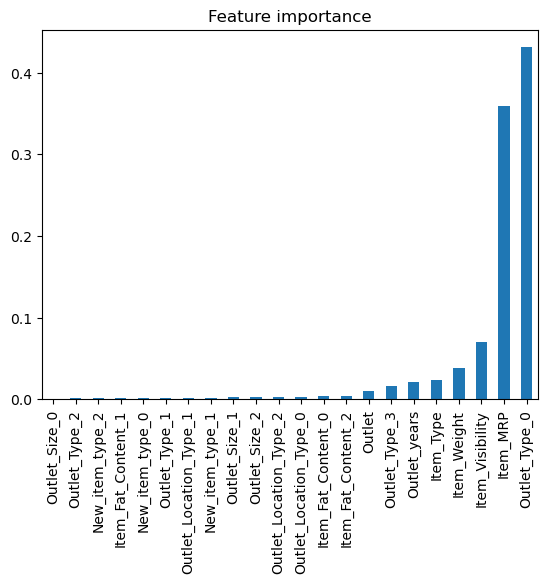

In [112]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values()
coef.plot(kind='bar', title="Feature importance")

MSE :  0.042173890853237465
Model Report
CV Score :  0.3058172318386538


<Axes: title={'center': 'Feature importance'}>

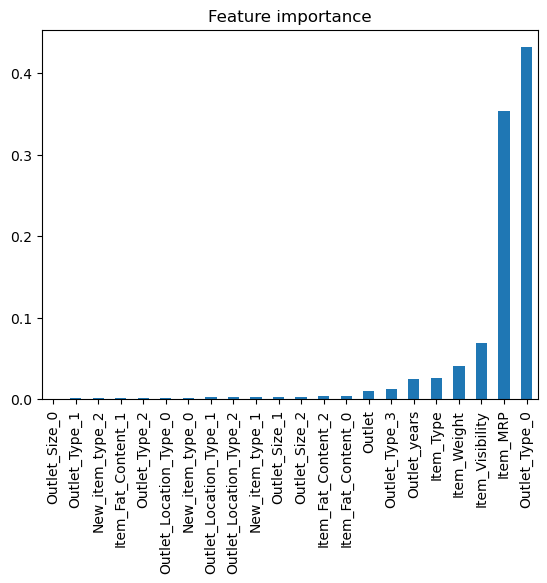

In [114]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values()
coef.plot(kind='bar', title="Feature importance")

MSE :  0.7628688679102086
Model Report
CV Score :  0.763026661690808


<Axes: title={'center': 'model coef'}>

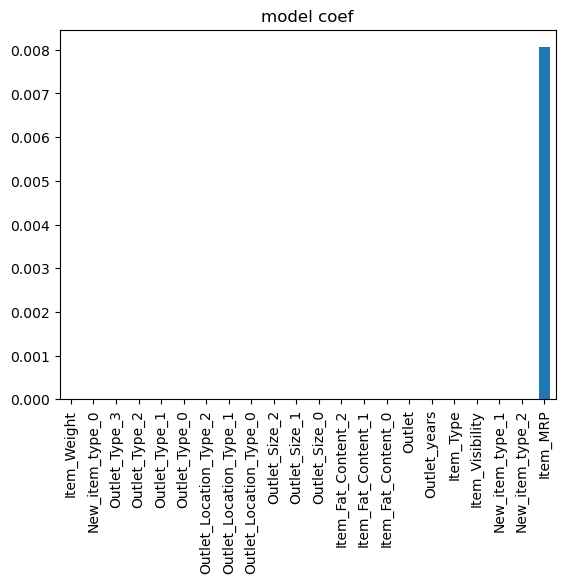

In [115]:
from sklearn.linear_model import Lasso
model = Lasso()
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar', title="model coef")